In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud

### A. Crawling Data

In [2]:
df = pd.read_csv('data_real.csv', index_col=0)

In [3]:
df_copy = df.copy()

In [4]:
df_copy.head(2)

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0


### B. Labeling Data

In [5]:
label = []
for i, row in df_copy.iterrows():
    if row['Rating'] == 1 or row['Rating'] == 2:
        label.append(0)
    else:
        label.append(1)

df_copy['label'] = label

### C. Preprocessing Teks

In [28]:
# ulasan ada yg huruf besar, di jadikan lowercase
# def casefolding(review):
#     review = review.lower()
#     return review
# df_copy['Ulasan'] = df_copy['Ulasan'].apply(casefolding)

df_copy['Ulasan'] = df_copy['Ulasan'].str.lower()

df_copy.head()

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan tidak sesuai dengan yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


**Normalisasi**

In [29]:
# Mengubah Teks Menjadi Lower

norm = {" dgn " : " dengan ", " gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus '}
def normalisasi(text):
    for i in norm:
        text = text.replace(i, norm[i])
    return text
df_copy['Ulasan'] =df_copy['Ulasan'].apply(lambda x: normalisasi(x))
df_copy.head(2)



,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan tidak sesuai dengan yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0


In [30]:
df_copy.head(3)

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan tidak sesuai dengan yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0


**StopWord**

In [31]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

# ga jauh berbeda hasilnya setelah di remove . jadi ini ga terlalu penting
df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: stopword(x))
df_copy.head(3)


,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan sesuai yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0


**Tokenize**

In [34]:
tokenized = df_copy['Ulasan'].apply(lambda x: x.split())
tokenized

0                       [pesanan, sesuai, yg, d, gambar]
1      [pengiriman, respon, super, cepat., tpi, baran...
2                 [barang, yg, dikirim, sesuai, pesanan]
3      [php,, bilang, isi, diseskripsi, pas, dipesen,...
4      [barang, jelek, copot&#34;, terus, tmpat, taro...
                             ...                        
995           [bagus, memuaskan., packing, bagus, cepat]
996             [mantap, pengiriman, cepat, rekomen, ed]
997                        [pengiriman, cepat., lumayan]
998              [belom, dicoba, semoga, oke, barangnya]
999    [barang, cukup, bagus,, respon, bagus., gak, m...
Name: Ulasan, Length: 1925, dtype: object

**Stemming**

Digunakan untuk memperkecil jumlah indeks yang berbeda dari satu data sehingga sebuah kata yg memiliki suffix maupun prefix akan kembali ke bentuk dasar nya<br>
misalnya:<br>
pesanan -> pesan<br>
membeli -> beli<br>

In [35]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [37]:
def stemming(Ulasan):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Ulasan:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []
    d_clean = ' '.join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('databersih2.csv', encoding='latin1')
data_clean.head(4)

pesan sesuai yg d gambar
kirim respon super cepat tpi barang sesuai gambar kuat tembus jok motor
barang yg kirim sesuai pesan
php bilang isi skripsi pas sen beda mubajir rp50 000 nyata isi ga cocok
barang jelek copot 34 terus tmpat taro isi
beli staples gak jual isi sekali pake ckckck
baik kalau mau ngirim barang periksa dulu gan kondisi barang layak apa gak gitu loh isi karat semua
produk sesuai order prohex yg kirim
barang sdh terima
buat masang jok gak pake
barang datang cacat gak guna harus sblum kirim coba dulu
kecewa baru dipakey isiya kluar 2 3 buah papan nempel
barang kurang bagus kirim pakai pos lama sekali
hasil staples rapat bidang mungkin produk cacat hadeeuh
barang standart n biasa aja kurang bagus 
barang rusak kecewa berat
beli 5 bs pakai semua
straples nya gk bs dipake udh coba berkali2 bwt pasang jaring nyamuk straples tembak bah triplek aja gk nembus udh diketok2 palu lgi 
mungkin harga juga jadi susah dipake hehe staples gak nancep sampe oenuh
gagal
ggdjkkjfkghfyhdjh

,Ulasan
0,pesan sesuai yg d gambar
1,kirim respon super cepat tpi barang sesuai gam...
2,barang yg kirim sesuai pesan
3,php bilang isi skripsi pas sen beda mubajir rp...


### D. Menggabungkan kedua Atribut

In [38]:
atribut1 = pd.read_csv('databersih2.csv')
atribut2 = pd.read_csv('data_real.csv')
atribut2 = atribut2['label']

result = pd.concat([atribut1, atribut2], axis=1)

In [39]:
result.head(3)

,Ulasan,label
0,pesan sesuai yg d gambar,0
1,kirim respon super cepat tpi barang sesuai gam...,0
2,barang yg kirim sesuai pesan,0


### E. Menghitung Kata Dengan TF-IDF

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [43]:
Ulasan = result['Ulasan']
Ulasan.isna().sum()


np.int64(7)

In [44]:
Ulasan = Ulasan.fillna('No Comment tho')

In [47]:
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

2838


In [ ]:
term_fit.vocabulary_

In [ ]:
# kolom pertama jumlah document
# kolom kedua berarti letak katanya
# kolom ketiga artinya hasil dari transform

term_frequency_all = term_fit.transform(Ulasan)
print(term_frequency_all)
# kolom 0, 1, 2 ini maksud nya jumlah document

In [57]:
ulasan_fit = Ulasan[1]
ulasan_fit

'kirim respon super cepat tpi barang sesuai gambar kuat tembus jok motor'

In [59]:
term_frequency = term_fit.transform([ulasan_fit])
print(term_frequency)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12 stored elements and shape (1, 2838)>
  Coords	Values
  (0, 301)	1
  (0, 565)	1
  (0, 909)	1
  (0, 1161)	1
  (0, 1297)	1
  (0, 1366)	1
  (0, 1661)	1
  (0, 2145)	1
  (0, 2304)	1
  (0, 2478)	1
  (0, 2557)	1
  (0, 2670)	1


In [61]:
dokumen = term_fit.transform(Ulasan)
tf_idf_transformer = TfidfTransformer().fit(dokumen)
print(tf_idf_transformer.idf_, '\n')

tfidf = tf_idf_transformer.transform(term_frequency)
print(tfidf)

[7.87005341 7.87005341 7.87005341 ... 7.87005341 7.87005341 7.87005341] 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12 stored elements and shape (1, 2838)>
  Coords	Values
  (0, 301)	0.1051362802807371
  (0, 565)	0.16432853043840337
  (0, 909)	0.23291200180119767
  (0, 1161)	0.40567105519321517
  (0, 1297)	0.15323781996366787
  (0, 1366)	0.32065382841286344
  (0, 1661)	0.40567105519321517
  (0, 2145)	0.20511196961849615
  (0, 2304)	0.13613036189834246
  (0, 2478)	0.3348592514769469
  (0, 2557)	0.40567105519321517
  (0, 2670)	0.3390481677443736


### F. Visualisasi(NLP)
Part 3

In [62]:
train_s0 = df_copy[df_copy['label'] == 0]

In [63]:
train_s0['Ulasan'] = train_s0['Ulasan'].fillna('Tidak Ada Komentar')

C:\Users\Hardi_Siswanto\AppData\Local\Temp\ipykernel_7572\1068184878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0['Ulasan'] = train_s0['Ulasan'].fillna('Tidak Ada Komentar')


In [64]:
train_s0.head(3)

,Unnamed: 0,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan sesuai yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0


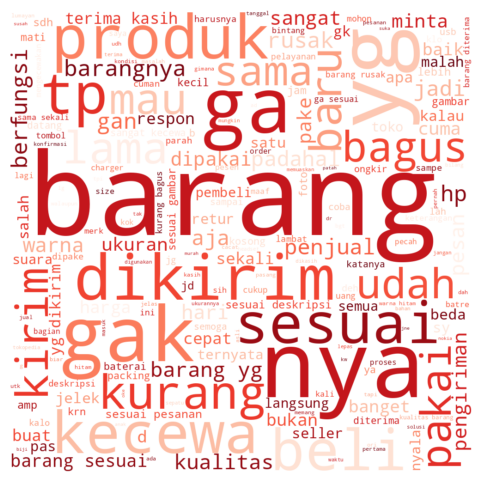

In [67]:
all_text_s0 = ' '.join(word for word in train_s0['Ulasan'])

wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white'
                        ).generate(all_text_s0)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [68]:
train_s1 = df_copy[df_copy['label'] == 1]

In [69]:
train_s1.isna().sum()

Unnamed: 0     0
Ulasan         0
Rating         0
Kategori       0
Nama Produk    0
Id Produk      0
Terjual        0
Id_Toko        0
Url            0
label          0
dtype: int64

In [70]:
train_s1['Ulasan'] = train_s1['Ulasan'].fillna('Tidak Ada Komentar') 

C:\Users\Hardi_Siswanto\AppData\Local\Temp\ipykernel_7572\1847112018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1['Ulasan'] = train_s1['Ulasan'].fillna('Tidak Ada Komentar')


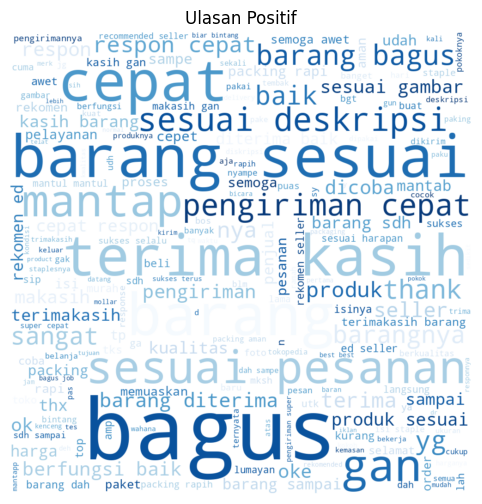

In [71]:
all_text_s1 = ' '.join(word for word in train_s1['Ulasan'])

wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white'
                        ).generate(all_text_s1)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ulasan Positif')
plt.margins(x=0, y=0)
plt.show()

C:\Users\Hardi_Siswanto\AppData\Local\Temp\ipykernel_7572\4082381669.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(df_copy['label'], sort=True)


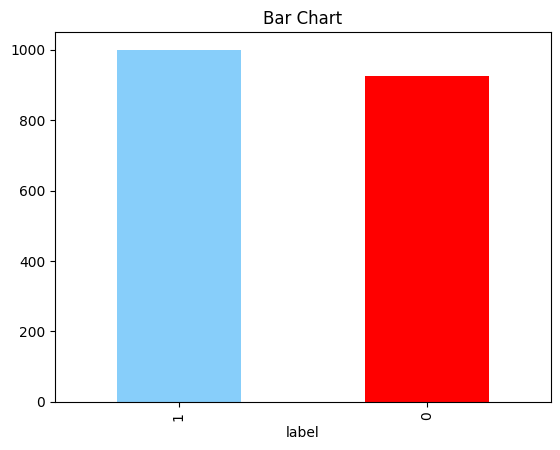

In [74]:
# perbedaan sentimen postif dan negatif

sentimen_data = pd.value_counts(df_copy['label'], sort=True)
sentimen_data.plot(kind='bar', color=['lightskyblue', 'red'])
plt.title('Bar Chart')
plt.show()

### G. Split Data (TF-IDF)

In [75]:
result['Ulasan'] = result['Ulasan'].fillna('Tidak ada Komentar')

In [79]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_train, Y_Test = train_test_split(result['Ulasan'], result['label'],
                                                    test_size=0.1, stratify=result['label'], random_state=30)

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [81]:
X_Train = vectorizer.fit_transform(X_Train)
X_Test = vectorizer.transform(X_Test)

print(X_Train.shape)
print(X_Test.shape)

(1732, 2701)
(193, 2701)


In [82]:
X_Train = X_Train.toarray()
X_Test = X_Test.toarray()

### H. Machine Learning (Naive Bayes Classifier)

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

nb = GaussianNB()

In [88]:
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}
gscv_nb = GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv = cv_method,
                        verbose = 1, 
                        scoring = 'accuracy')

gscv_nb.fit(X_Train, Y_train)
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': np.float64(0.006579332246575682)}

In [108]:
nb = GaussianNB(var_smoothing=0.006579332246575682)

In [109]:
nb.fit(X_Train, Y_train)

,priors,None
,var_smoothing,0.006579332246575682


In [110]:
y_pred_nb = nb.predict(X_Test)

### I. Confusion Matrix

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay

In [112]:
accuracy_score(Y_Test, y_pred_nb)

0.844559585492228

In [113]:
confus = confusion_matrix(Y_Test, y_pred_nb)
print(confus)

[[72 21]
 [ 9 91]]


In [ ]:
# report = pd.DataFrame(classification_report(Y_Test, y_pred_nb, output_dict=True)).transpose()     #pake ini bisa liat accuracy
report = classification_report(Y_Test, y_pred_nb)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        93
           1       0.81      0.91      0.86       100

    accuracy                           0.84       193
   macro avg       0.85      0.84      0.84       193
weighted avg       0.85      0.84      0.84       193



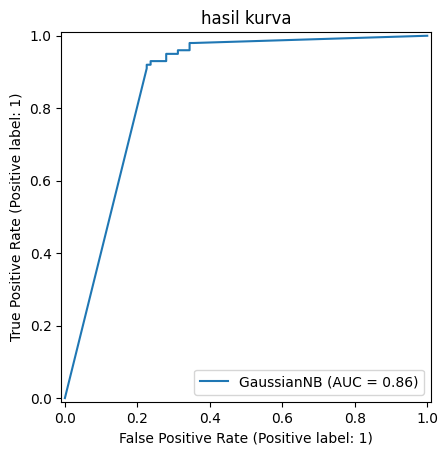

In [117]:
RocCurveDisplay.from_estimator(nb, X_Test, Y_Test)
plt.title('hasil kurva')
plt.show()